# Table of Contents

* [Module Imports](#first-bullet)

* [Allegheny County, Tracts](#second-bullet)

* [First Merge between data and study_area to make data_plot](#Third-bullet)

* [Parks and Gyms Data Collection](#fourth-bullet)

* [Second Merge between data_plots and Census Data](#5-bullet)

* [Final GeoDataFrame Polishing](#second-bullet)

* [Exploratory Data Analysis](#second-bullet)

* [Regression](#second-bullet)

### MetaData for Obesity Data

"description": "Obesity rates for each Census Tract in Allegheny County were produced for the study \\u201cDeveloping small-area predictions for smoking and obesity prevalence in the United States.\\" The data is not explicitly based on population surveys or data collection conducted in Allegheny County, but rather estimated using statistical modeling techniques. In this technique, researchers applied the obesity rate of a demographically similar census tract to one in Allegheny County to compute an obesity rate.", 

"distribution": [\{"@type": "dcat:Distribution", "downloadURL": "https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa/download/obesity-ac-2006-2010censustracts.csv", "mediaType": "text/csv", "title": "Obesity Rates Allegheny County Data"\}, \{"@type": "dcat:Distribution", "downloadURL": "https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/9e6a2b51-90ca-47f8-b2f2-5ea275bd2f53/download/data-obesetractgamephitaugust082013.csv", "mediaType": "text/csv", "title": "Obesity Rates Statewide Data"\}, \{"@type": "dcat:Distribution", "downloadURL": "https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/a19a6a1a-90cb-4d39-859c-0c7eacf256e2/download/dictionary-obesity-rate.csv", "mediaType": "text/csv", "title": "Obesity Rates Data Dictionary"\}, \{"@type": "dcat:Distribution", "downloadURL": "https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/d90c9929-9b9e-49eb-b2cb-0460b7dc73e8/download/obesityrates.zip", "mediaType": "application/zip", "title": "Obesity Rates Allegheny County Data"\}, \{"@type": "dcat:Distribution", "downloadURL": "https://tools.wprdc.org/guides/dash-data-guide/alleghenycountyobesityrates/", "mediaType": "text/html", "title": "DASH Data Guide"\}], "identifier": "b049da40-910a-4b9d-9438-ff584e432bb1", "keyword": ["ACHD DASH", "Obesity", "social determinants of health"], "license": "http://www.opendefinition.org/licenses/cc-zero", "modified": "2018-04-03T18:27:14.816271", "publisher": \{"@type": "org:Organization", "name": "Allegheny County / City of Pittsburgh / Western PA Regional Data Center"\}, "theme": ["Health"], "title": "Allegheny County Obesity Rates"\}}

## Module Imports <a class="anchor" id="Module Imports"></a>

Modules are packages made in the Python language. Modules are packaged functions that can be called from files to prefrom calculations. These modules have been downloaded from the open source python distribution known as Anaconda. Anaconda is the leading data science for machine learning and data science for the languages R, and Python.

The following modules were used from the python distribution known as the Anaconda distribution: Pandas to tabulate data, Numpy to tabulate data, Matplotlib and pyplot to produce visuals, Geopandas to map, scipy and scit-kitlearn to perform the regression analysis.  

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import geopandas
from geopandas import GeoDataFrame
import fiona
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 30)

In [8]:
data = pd.read_csv('Obesity_Data.csv')
data = data.rename(columns = {'2000 Tract':'Tract_Num'})

This data contains obesity rates at the tract scale. Looking at the Neighborhood names and compared to the tract numbers each tract as a unquine number but it can have mulpile of the same neighborhood names. 

My Plan is to join this table with a tracts shapefile from the year 2000. On the field 2000 Tract which I will end up renaming to something easier. 

In [9]:
data

,stname,GEOID,Tract_Num,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
5,Pennsylvania,42003040400,40400,NaN,PITTSBURGH,Pittsburgh,North oakland,0.155867
6,Pennsylvania,42003040500,40500,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.112780
7,Pennsylvania,42003040600,40600,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.144556
8,Pennsylvania,42003040900,40900,NaN,PITTSBURGH,Pittsburgh,South Oakland,0.281331
9,Pennsylvania,42003050100,50100,NaN,PITTSBURGH,Pittsburgh,Middle Hill,0.608099


#### Tract Validation in both tables
Just confirming that this tract exist becuase in the other table it does too but loses gemoetry in the data_plot map.

In [10]:
data.loc[data['Tract_Num'] == 151500]

,stname,GEOID,Tract_Num,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
59,Pennsylvania,42003151500,151500,562900,PITTSBURGH,Pittsburgh,Hazelwood,0.399853


### Duplicate Check 
As seen by the test to ensure we do not have duplicate records. This code shows the dataframe without any dulicpates. If there were duplicates there what you would see is True. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [11]:
data.duplicated('Tract_Num')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
       ...  
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
Length: 416, dtype: bool

## Geopandas Module to visiualize data
Here we have the Allegheny shapefile for county tracts set for the year 2016. This shapefile was made by the Allegheny county gis comission. I have been having issues with using this file I think I should create a Allegheny tracts shapefile based on the 2000 cencus. 
http://geopandas.org


In [12]:
study_area = geopandas.read_file('All_Tracts/2000_Tracts/tl_2010_42003_tract00.shp')
#study_area = geopandas.read_file('All_Tracts/2016 Tracts/Allegheny_County_Census_Tracts_2016.shp')
#study_area = geopandas.read_file(geopandas.datasets.get_path('Allegheny_County_Census_Tracts_2016.shp'))
study_area = study_area.rename(columns={'TRACTCE00': 'Tract_Num'})
study_area.head()

,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry
0,42,003,509400,42003509400,5094,Census Tract 5094,G5020,S,2582803,0,+40.4089804,-079.8210570,"POLYGON ((-79.817899 40.416443, -79.81759 40.4..."
1,42,003,508000,42003508000,5080,Census Tract 5080,G5020,S,1102202,0,+40.3942015,-079.8102282,"POLYGON ((-79.814165 40.389742, -79.8142479999..."
2,42,003,507000,42003507000,5070,Census Tract 5070,G5020,S,1034201,0,+40.3849097,-079.8072431,"POLYGON ((-79.81406699999999 40.383586, -79.81..."
3,42,003,506000,42003506000,5060,Census Tract 5060,G5020,S,1191110,0,+40.3914701,-079.7856771,"POLYGON ((-79.795081 40.39221, -79.79525699999..."
4,42,003,505000,42003505000,5050,Census Tract 5050,G5020,S,530956,0,+40.3811696,-079.7702632,"POLYGON ((-79.766164 40.383842, -79.766178 40...."


#### Quick visual of the tracts in the county
This does not show any missing tracts or incomplete polygons.

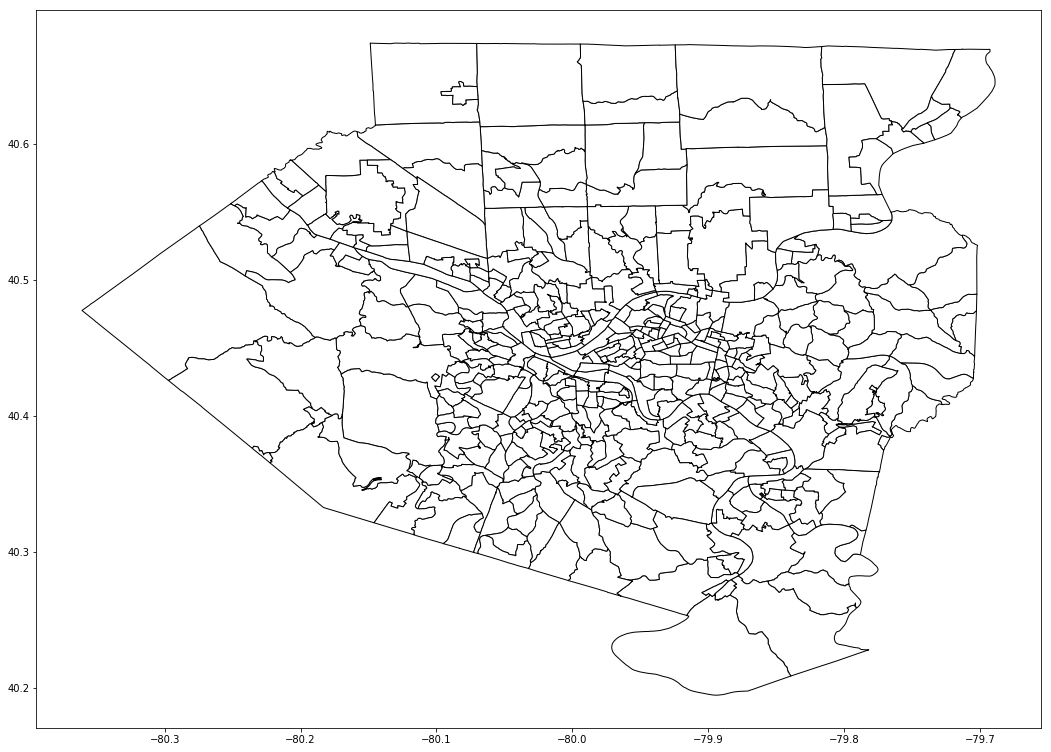

In [13]:
study_area.plot(color =('white'),figsize=(18,14),edgecolor=('black'))

## First Merge between data and study_area to make data_plot.<a class="anchor" id="First Merge between data and study_area to make data_plot"></a>

This code is casting the Tract_Num variable into an integer so it can be joined with the obesity data file.
study_area['Tract_Num'] = study_area['Tract_Num'].astype(int)
data['Tract_Num'] = data['Tract_Num'].astype(int)

Then I use the merge method from pandas.

To join files in pandas the methods merge, join, and concat(concatenation) are made avalible. The differences are listed in the documentation but the reason why I used merge here instead of join is because of the issues I was having with the duplicates in the obesity dataset. Below are the paratmeters for merge.

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
         
pd.merge(left, right, on='B', how='outer', validate="one_to_many")


Converting types to matchup for the merge

df['year']=df['year'].astype(int)

I also did some clean up here to make the table nicer to look at. I dropped some columns as indicated by the drop function and renamed 006-2010 estimate of obesity to obesity for quality of life. 

#### Methodology
In Obesity is inversly related to the physical enviroment, the authors choose to use data at the county level and a website that stored facility data at the county level (Pitt 2013). Here I am doing exactly that but at the Census tract scale. Below is a visiualization of obesity rates in Allegheny County. Unlike Pitts study I choose to use an unclassified scheme to map the data. The advantage to doing this is there are not outliers the numbers just tell the story like it is. 

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


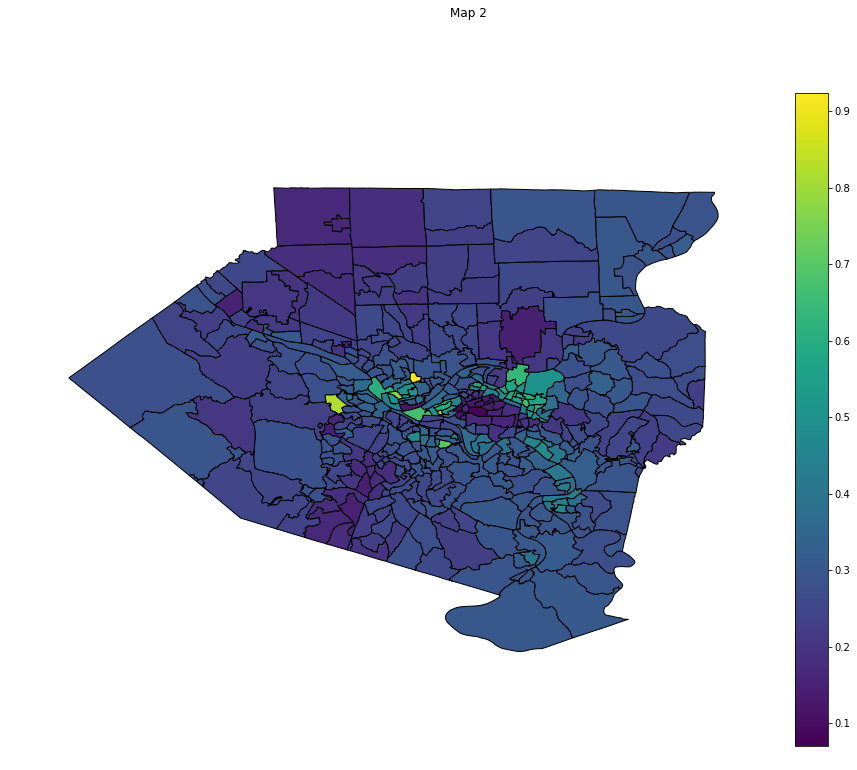

In [14]:
study_area['Tract_Num'] = study_area['Tract_Num'].astype(int)
data['Tract_Num'] = data['Tract_Num'].astype(int)

data_plot = pd.merge(study_area, data, on='Tract_Num')
data_plot = data_plot.rename(columns = {'2006-2010 estimate of obesity': 'Obesity'})
#data_plot = data_plot.drop(['stname', 'GEOID_x','2010 Tract','MUNICIPALITY','Municipality','FID','STATEFP','COUNTYFP','AFFGEOID','GEOID_y','LSAD','ALAND','AWATER','Shape__Are','Shape__Len'], axis=1)
#data_plot.to_csv('Joined.csv')
#data_plot = data_plot.dropna(subset=['geometry'])
#data_plot = GeoDataFrame(data_plot,geometry=data['geometry'])

f, ax = plt.subplots(1, figsize=(16,12))
ax = data_plot.plot(axes=ax, column='Obesity',edgecolor=('black'), legend=(True))
ax.set_axis_off()
f.suptitle('Map 2')
lims = plt.axis('equal')
plt.show()

#### Map 2
Above is the an unclassified scheme  distribution of obesity rates throughout the tracts of Allengheny County PA.
Contributions to styling and design: http://darribas.org/gds15/content/labs/lab_03.html

### Attribute table for Map 2

In [15]:
data_plot

,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,stname,GEOID,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity
0,42,003,509400,42003509400,5094,Census Tract 5094,G5020,S,2582803,0,+40.4089804,-079.8210570,"POLYGON ((-79.817899 40.416443, -79.81759 40.4...",Pennsylvania,42003509400,NaN,TURTLE CREEK,Turtle Creek,NaN,0.287971
1,42,003,508000,42003508000,5080,Census Tract 5080,G5020,S,1102202,0,+40.3942015,-079.8102282,"POLYGON ((-79.814165 40.389742, -79.8142479999...",Pennsylvania,42003508000,NaN,WILMERDING,Wilmerding,NaN,0.299366
2,42,003,507000,42003507000,5070,Census Tract 5070,G5020,S,1034201,0,+40.3849097,-079.8072431,"POLYGON ((-79.81406699999999 40.383586, -79.81...",Pennsylvania,42003507000,NaN,EAST MCKEESPORT,East McKeesport,NaN,0.297379
3,42,003,506000,42003506000,5060,Census Tract 5060,G5020,S,1191110,0,+40.3914701,-079.7856771,"POLYGON ((-79.795081 40.39221, -79.79525699999...",Pennsylvania,42003564400,5644,WALL,Wall,NaN,0.304834
4,42,003,505000,42003505000,5050,Census Tract 5050,G5020,S,530956,0,+40.3811696,-079.7702632,"POLYGON ((-79.766164 40.383842, -79.766178 40....",Pennsylvania,42003564400,5644,TRAFFORD (PART),Trafford (part),NaN,0.249314
5,42,003,504400,42003504400,5044,Census Tract 5044,G5020,S,12215436,0,+40.3744341,-079.7927129,"POLYGON ((-79.77376799999999 40.358869, -79.77...",Pennsylvania,42003564400,5644,NORTH VERSAILLES,North Versailles,NaN,0.294694
6,42,003,504100,42003504100,5041,Census Tract 5041,G5020,S,8758701,447756,+40.3835394,-079.8304306,"POLYGON ((-79.848851 40.385003, -79.8492519999...",Pennsylvania,42003504100,NaN,NORTH VERSAILLES,North Versailles,NaN,0.322759
7,42,003,503002,42003503002,5030.02,Census Tract 5030.02,G5020,S,5364019,0,+40.3475825,-079.8153967,"POLYGON ((-79.81340299999999 40.333095, -79.81...",Pennsylvania,42003503002,NaN,WHITE OAK,White Oak,NaN,0.266623
8,42,003,432400,42003432400,4324,Census Tract 4324,G5020,S,722185,175678,+40.4981264,-080.0683549,"POLYGON ((-80.071935 40.496332, -80.0719769999...",Pennsylvania,42003432400,NaN,AVALON,Avalon,NaN,0.282743
9,42,003,432300,42003432300,4323,Census Tract 4323,G5020,S,896995,0,+40.5046187,-080.0679388,"POLYGON ((-80.06142799999999 40.502581, -80.06...",Pennsylvania,42003432300,NaN,AVALON,Avalon,NaN,0.282805


# Parks and Gyms Data collection<a class="anchor" id="Parks and Gyms Data Collection"></a>


## Google Maps Platform to gather point, name, and gym type information.

The modules that are needed to do this are googlemaps to access the API.
Pretty print so I can use python to extract information from the json file that will be downloaded.
Time is so I can delay the code to produce the next page.
Key is a method I developed to keep my API key to google unseen. 
<p>Source:
https://developers.google.com/places/web-service/intro

To obtain the point data for gyms and parks the Google Places API was queried for results at the 40.440174, -79.996307 latitude longitude in a 20 kilometer radius. The API produced a json file that was processed into shapefiles. This processing was performed using for loops in the standard python library. Each json file was iterated over 4 times to obtain the following information: geometry by latitude and longitude, names of both the parks and gyms, and place ID a code used by google to index all locations. 

In [16]:
import googlemaps
import pprint
import time
from Key import GetKey

gmaps = googlemaps.Client(key = GetKey())

places_result = gmaps.places_nearby(location = '40.440174,-79.996307', radius = 20000, open_now = False, type = 'gym')
time.sleep(3)
places_result = gmaps.places_nearby(page_token = places_result['next_page_token'])

pprint.pprint(places_result)

{'html_attributions': [],
 'next_page_token': 'CsQDugEAAPsy4AP1jC81g7OvNtUYaclJck4ED1NLiXT5F_Gk9pr1STCyLQwktNqupvaJGjOIoT1u3Kh0VbnF-Scos0CwKYanTttbZ3wRJYTnwrubVG1sWbjPHn22MpqLydM9Z4VlpNUGyt91-8B-fq8gWyuMlkL1zBl_Mnx-9PmE88Hvm0ZEAa1p8TG_PTVLzFbbtYAxYJ4oBGjz69dQCPHlxKqPLcTrrc07qvq30M-V10s2N4AanelUHhYal_HRA_qinWAxxc4ccJe_DsdFChbjamYHVuJNjGsKFjPnkwQjTB8a0777Yv7_zE5KFTXZhamYDa_Z-QRTPwCKQshEiLIX5KrfKF3fRF50TdIaAKitkEBWqJKlcUk9ZCmYayHsOHCRXSIDN4nEv2HwXRRD2ZeIhy-0LWftwu7bMC2e5wtLwmcfa36tbqeIdW5UVKudBnHt_G9gxApGgGEO6vjirGfiHvf5vsSE9-EZkcvTVY0x8J6u2vEbzy3f1mHGG3lXg-AkPOfe0q5WKHF5YdpJwn9E1xbF1UMrQpDVF27VVJ8PXsYccm6CUGvnDRLHt73IP4_dJSunYPzC6Wi1GPgFoafZqY-NgTUSEK8mUmgyzR7xazAdXsLgOoUaFK4uAreoXkmZGtZ6SytN4TeE0wzx',
 'results': [{'geometry': {'location': {'lat': 40.4271124,
                                        'lng': -79.96660039999999},
                           'viewport': {'northeast': {'lat': 40.4284952802915,
                                                      'lng': -79.9654385197085},
   

Next idea:
For loop through the dictionary and attempt to snatch up:
geometry, location lat longs
name
place_id
One I get it out into variables then maybe I can put it into a dataframe. 

Okay here is me for loop going through an extracting all of the place ids. Since I can do this I can definitely harvest lat longs and gym names. (I might hold off on gym names and run a place details instead. 

In [ ]:
for place in places_result['results']:
    #making a variable for place id
    my_place_id = place['place_id']
    print(my_place_id)

Below I have printed out the lat and longs for the points, but this is a lot more than what I wanted. I need to figure out how to go down one more layer in the dictionaries. 

Here is an example of how to access the elements of nested dictionaries:
people = {1: {'name': 'John', 'age': '27', 'sex': 'Male'},
          2: {'name': 'Marie', 'age': '22', 'sex': 'Female'}}

print(people[1]['name'])
print(people[1]['age'])
print(people[1]['sex'])

Incase I mess up:
for place in places_result['results']:
    #making a variable for lat
    lat = place['geometry']
    print(lat)

### Latitude 

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    lat = place['geometry']['location']['lat']
    print(lat)

### Longitude 

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    long = place['geometry']['location']['lng']
    print(long)

### Name?

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    name = place['name']
    print(name)

#### Creating the geometry field for geopandas
https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html

I used the shapely tool set to help set the geometry for the points.

## Gym GeoDataFrame

This GeoDataFrame was used to hold the data for the gym points extracted from the Google Maps Platform. Detailed below the Gym_Points file is read into the GeoDataFrame. The Coordinates column is then formmated into the correct layout for GeoPandas to read.

In [18]:
from shapely.geometry import Point

gyms = pd.read_excel('Gym_Points.xlsx')
gyms['Coordinates'] = list(zip(gyms.Long, gyms.Lat))
gyms['Coordinates'] = gyms['Coordinates'].apply(Point)
gyms = GeoDataFrame(gyms, crs={'init': 'epsg:4269'}, geometry='Coordinates')
type(gyms)
gyms.head()

,Gym_Name,Lat,Long,Coordinates
0,Amazing Yoga,40.451034,-79.935016,POINT (-79.9350163 40.4510345)
1,Town Place Fitness,40.440750,-80.003872,POINT (-80.0038716 40.4407503)
2,Fitness Factory,40.458515,-79.925384,POINT (-79.92538399999999 40.458515)
3,GreenTree SportsPlex,40.420343,-80.058117,POINT (-80.05811679999999 40.420343)
4,Ice Castle Arena,40.366207,-80.026361,POINT (-80.02636129999991 40.3662067)


Saving layer out to shapefile:

In [13]:
gyms.to_file('ShapeFiles/Gyms/gyms.shp')

# Park Data

In [ ]:
gmaps = googlemaps.Client(key = GetKey())

places_result = gmaps.places_nearby(location = '40.440174,-79.996307', radius = 20000, open_now = False, type = 'park')
time.sleep(3)
places_result = gmaps.places_nearby(page_token = places_result['next_page_token'])

pprint.pprint(places_result)

### Place ID

In [ ]:
#appendfile = open('Parks_points.xlsx','a')
for place in places_result['results']:
    #making a variable for place id
    my_place_id = place['place_id']
    print(my_place_id)

### Name

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    name = place['name']
    print(name)

### Lat

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    lat = place['geometry']['location']['lat']
    print(lat)

### Long

In [ ]:
for place in places_result['results']:
    #making a variable for lat
    long = place['geometry']['location']['lng']
    print(long)

## Parks GeoDataFrame

In [19]:
parks = pd.read_excel('Park_Points.xlsx')
parks = parks.dropna()
parks['Coordinates_p'] = list(zip(parks.Long, parks.Lat))
parks['Coordinates_p'] = parks['Coordinates_p'].apply(Point)
parks = GeoDataFrame(parks, crs={'init': 'epsg:4269'}, geometry='Coordinates_p')
parks.head()

,Name,Lat,Long,Coordinates_p
0,Phipps Conservatory and Botanical Gardens,40.439197,-79.9474,POINT (-79.9473787 40.4391973)
1,Gateway Center Park,40.440537,-80.0055,POINT (-80.0054548 40.4405366999999)
2,Pittsburgh Parks Conservancy,40.429858,-79.9726,POINT (-79.97261519999989 40.429858)
3,Schenley Park,40.434849,-79.9425,POINT (-79.9424885999999 40.4348492)
4,Point State Park,40.441572,-80.0079,POINT (-80.00785379999991 40.4415719)


Saving layer out to shapefile:

In [403]:
parks.to_file(filename='ShapeFiles/Parks/parks.shp')

# Map with combined layers

#### Methodology
This step was done to address facility deserts found in a study done "Neighbourhood deprivation and the cost of accessing gyms and fitness centres: National study in Wales"(Evans 2013). While their study did do a nearest neighbor analysis I do not think that would be worth wild here because of the small size of this data and the clustering in urban areas. 

Below is <b>map 3</b>. This displays 
<p font color="EC4926">Orange points are gyms.
Red points are parks.

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


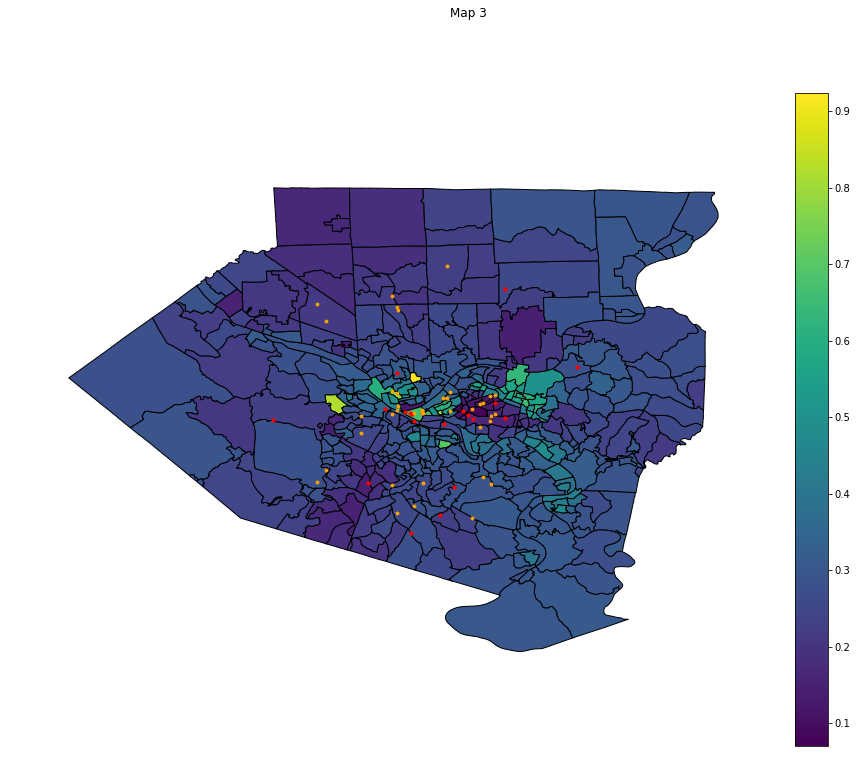

In [20]:
f, ax = plt.subplots(1, figsize=(16,12))
ax = data_plot.plot(axes=ax, column='Obesity',edgecolor=('black'), legend=(True))
parks.plot(ax=ax, marker='o', color='red', markersize=8)
gyms.plot(ax=ax, marker='o', color='Orange', markersize=8)
ax.set_axis_off()
f.suptitle('Map 3')
lims = plt.axis('equal')
plt.show()

## Checking coordinate systems with crs

In [21]:
print(data_plot.crs)

{'init': 'epsg:4269'}


In [22]:
print(parks.crs)

{'init': 'epsg:4269'}


In [23]:
print(gyms.crs)

{'init': 'epsg:4269'}


# Spatial Joins

#### This is the documentation for how to do a spaital join

geopandas.sjoin(left_df, right_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
Because this function is reseting the dataframe to behave like a panadas dataframe I needed to reset the geometry to make it a geodataframe again. 

# Join instructions and workflow:

Spaital join gyms to data_plot

spatial join parks to data_plot

group by( like what you did down there) apply to 

merge data_plots to demographic data

In [24]:
joined_park = geopandas.sjoin(parks, data_plot, how='right', op ='intersects')
joined_park

,index_left,Name,Lat,Long,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,stname,GEOID,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity
index_right,,,,,,,,,,,,,,,,,,,,,,,,
88,0.0,Phipps Conservatory and Botanical Gardens,40.439197,-79.9474,42,003,141300,42003141300,1413,Census Tract 1413,G5020,S,2489760,8799,+40.4348366,-079.9408601,"POLYGON ((-79.948041 40.428173, -79.948605 40....",Pennsylvania,42003141300,NaN,PITTSBURGH,Pittsburgh,Squirrel Hill South,0.164996
88,3.0,Schenley Park,40.434849,-79.9425,42,003,141300,42003141300,1413,Census Tract 1413,G5020,S,2489760,8799,+40.4348366,-079.9408601,"POLYGON ((-79.948041 40.428173, -79.948605 40....",Pennsylvania,42003141300,NaN,PITTSBURGH,Pittsburgh,Squirrel Hill South,0.164996
88,20.0,Mellon Square,40.439197,-79.9474,42,003,141300,42003141300,1413,Census Tract 1413,G5020,S,2489760,8799,+40.4348366,-079.9408601,"POLYGON ((-79.948041 40.428173, -79.948605 40....",Pennsylvania,42003141300,NaN,PITTSBURGH,Pittsburgh,Squirrel Hill South,0.164996
88,23.0,South Shore Riverfront Park,40.434849,-79.9425,42,003,141300,42003141300,1413,Census Tract 1413,G5020,S,2489760,8799,+40.4348366,-079.9408601,"POLYGON ((-79.948041 40.428173, -79.948605 40....",Pennsylvania,42003141300,NaN,PITTSBURGH,Pittsburgh,Squirrel Hill South,0.164996
336,1.0,Gateway Center Park,40.440537,-80.0055,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,4.0,Point State Park,40.441572,-80.0079,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,11.0,Steel Plaza,40.440916,-79.9953,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,19.0,Point State Park Fountain,40.441831,-80.0128,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,21.0,Millennium Park,40.440537,-80.0055,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012


In [25]:
joined_gyms = geopandas.sjoin(gyms, data_plot, how='right', op = 'intersects')
joined_gyms

,index_left,Gym_Name,Lat,Long,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,stname,GEOID,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity
index_right,,,,,,,,,,,,,,,,,,,,,,,,
256,0.0,Amazing Yoga,40.451034,-79.935016,42,003,70300,42003070300,703,Census Tract 703,G5020,S,428548,0,+40.4507838,-079.9352040,"POLYGON ((-79.937212 40.447798, -79.937291 40....",Pennsylvania,42003070300,NaN,PITTSBURGH,Pittsburgh,Shadyside,0.128451
256,16.0,X Shadyside,40.451566,-79.931741,42,003,70300,42003070300,703,Census Tract 703,G5020,S,428548,0,+40.4507838,-079.9352040,"POLYGON ((-79.937212 40.447798, -79.937291 40....",Pennsylvania,42003070300,NaN,PITTSBURGH,Pittsburgh,Shadyside,0.128451
336,1.0,Town Place Fitness,40.440750,-80.003872,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,5.0,YMCA at the U.S. Steel Tower,40.441414,-79.994708,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,10.0,Executive Fitness Center,40.444195,-79.994778,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
336,30.0,"Moxie Mind and Body, Pilates Studio LLC",40.441123,-79.994778,42,003,20100,42003020100,201,Census Tract 201,G5020,S,1677888,479693,+40.4407662,-079.9992790,"POLYGON ((-79.99211199999999 40.442806, -79.99...",Pennsylvania,42003020100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
255,2.0,Fitness Factory,40.458515,-79.925384,42,003,70500,42003070500,705,Census Tract 705,G5020,S,412753,0,+40.4560165,-079.9289619,"POLYGON ((-79.92554699999999 40.454059, -79.92...",Pennsylvania,42003070500,NaN,PITTSBURGH,Pittsburgh,Shadyside,0.130383
322,3.0,GreenTree SportsPlex,40.420343,-80.058117,42,003,469000,42003469000,4690,Census Tract 4690,G5020,S,5396099,0,+40.4170111,-080.0543645,POLYGON ((-80.06747799999999 40.40928299999999...,Pennsylvania,42003469000,NaN,GREENTREE,Greentree,NaN,0.253231
354,4.0,Ice Castle Arena,40.366207,-80.026361,42,003,476100,42003476100,4761,Census Tract 4761,G5020,S,2360074,0,+40.3673868,-080.0231722,"POLYGON ((-80.037368 40.369152, -80.0364029999...",Pennsylvania,42003476100,NaN,CASTLE SHANNON,Castle Shannon,NaN,0.255666


# Census Data Merge <a class="anchor" id="Second Merge between data_plots and Census Data"></a>
The Census data contains demographic information such as age, race, and physical environmental varaibles. The Census data will be merged to data_plot. To reiterate the data_plot GeoDataFrame is the shapefile that contains the information on Allegheny county tracts. 

<ul Type="1">
    <li>The demo variable will be used as the storage container for the Census Data.</li>
    <li>The column GEOID10 will be converted to GEOID to enable the merge to occur.</li>
    <li>Demo will be merged to data_plot using the right parameter to preserve the index of data_plots.</li>
    <li>The final GeoDataFrame will be created and the index column will be renamed to Key.</li>
</ul>

In [26]:
demo = geopandas.read_file('All_Tracts/2010_Tracts/Tract_2010Census_DP1.shp')

In [27]:
demo = demo.rename(columns={'GEOID10':'GEOID'})
demo['GEOID'] = demo['GEOID'].astype(int)
#join_2['GEOID'] = join_2['GEOID'].astype(int)

In [28]:
final = demo.merge(data_plot, how='right', on = 'GEOID')
#final = final.reset_index()
#final = final.drop(columns={'index_right','index_left'})
#final = GeoDataFrame(final, crs={'init':'epsg:4269'}, geometry='geometry_x')
final.index.name = 'Key'
final

,GEOID,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,DP0010006,DP0010007,DP0010008,DP0010009,DP0010010,DP0010011,DP0010012,DP0010013,DP0010014,DP0010015,DP0010016,DP0010017,DP0010018,DP0010019,...,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry_x,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry_y,stname,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity
Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42003560500,Census Tract 5605,464657.0,0.0,+40.4377740,-079.8912723,2176.0,95.0,55.0,62.0,59.0,200.0,334.0,257.0,165.0,157.0,126.0,165.0,172.0,116.0,68.0,42.0,50.0,29.0,24.0,...,1190.0,2.06,1.57,0.028671,0.000049,POLYGON ((-79.88975199999999 40.43554400000005...,42,003,560500,42003560500,5605,Census Tract 5605,G5020,S,476378,0,+40.4377113,-079.8911821,"POLYGON ((-79.88928899999999 40.435547, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.224347
1,42003560400,Census Tract 5604,511109.0,0.0,+40.4446636,-079.8902459,1559.0,65.0,57.0,61.0,73.0,114.0,139.0,105.0,77.0,88.0,132.0,144.0,145.0,125.0,64.0,46.0,37.0,43.0,44.0,...,1172.0,2.08,1.59,0.033494,0.000054,"POLYGON ((-79.88648000000001 40.4400940000001,...",42,003,560400,42003560400,5604,Census Tract 5604,G5020,S,507627,0,+40.4447000,-079.8902060,"POLYGON ((-79.88654799999999 40.440502, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.437485
2,42003552400,Census Tract 5524,2044853.0,200574.0,+40.3332132,-079.8436326,3017.0,173.0,177.0,174.0,188.0,179.0,170.0,157.0,159.0,196.0,214.0,242.0,225.0,164.0,135.0,121.0,122.0,120.0,101.0,...,983.0,2.22,2.31,0.098148,0.000238,POLYGON ((-79.84286199999997 40.32385499999998...,42,003,552400,42003552400,5524,Census Tract 5524,G5020,S,2050701,210971,+40.3332132,-079.8436326,"POLYGON ((-79.842862 40.32385499999999, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.302839
3,42003552300,Census Tract 5523,830982.0,0.0,+40.3417540,-079.8513513,2184.0,135.0,164.0,200.0,218.0,137.0,108.0,123.0,123.0,111.0,156.0,159.0,146.0,116.0,92.0,67.0,53.0,45.0,31.0,...,1040.0,2.38,2.83,0.050429,0.000088,"POLYGON ((-79.84599300000002 40.345144, -79.84...",42,003,552300,42003552300,5523,Census Tract 5523,G5020,S,830478,0,+40.3417540,-079.8513545,"POLYGON ((-79.84599299999999 40.345144, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.478170
4,42003552200,Census Tract 5522,804538.0,243347.0,+40.3488998,-079.8775090,1100.0,71.0,51.0,67.0,72.0,77.0,69.0,66.0,57.0,73.0,91.0,110.0,77.0,60.0,33.0,42.0,29.0,30.0,25.0,...,457.0,2.26,2.31,0.048411,0.000111,POLYGON ((-79.87062999999995 40.35538800000012...,42,003,552200,42003552200,5522,Census Tract 5522,G5020,S,816471,248584,+40.3493744,-079.8763413,"POLYGON ((-79.87062999999999 40.355388, -79.87...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.303568
5,42003552100,Census Tract 5521,692578.0,85815.0,+40.3450536,-079.8633846,1450.0,94.0,76.0,71.0,75.0,74.0,47.0,44.0,57.0,50.0,65.0,94.0,65.0,91.0,83.0,70.0,77.0,121.0,196.0,...,733.0,2.17,2.01,0.049635,0.000083,POLYGON ((-79.86800399999993 40.34957900000001...,42,003,552100,42003552100,5521,Census Tract 5521,G5020,S,692578,89238,+40.3450536,-079.8633846,"POLYGON ((-79.868004 40.349579, -79.867818 40....",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.388908
6,42003060500,Census Tract 605,657516.0,0.0,+40.4576591,-079.9662264,1274.0,55.0,45.0,27.0,39.0,109.0,147.0,141.0,76.0,84.0,93.0,84.0,102.0,68.0,43.0,50.0,23.0,50.0,38.0,...,550.0,2.07,1.58,0.049557,0.000070,POLYGON ((-79.95733899999993 40.45863400000007...,42,003,60500,42003060500,605,Census Tract 605,G5020,S,714445,0,+40.4578844,-079.9658865,"POLYGON ((-79.95885299999999 40.457975, -79.95...",Pennsylvania,NaN,PITTSBURGH,Pittsburgh,Polish Hill,0.320701
7,42003060300,Census Tract 603,1119311.0,144825.0,+40.4649258,-079.9653098,2341.0,85.0,89.0,108.0,104.0,244.0,351.0,208.0,132.0,143.0,139.0,152.0,154.0,127.0,92.0,55.0,62.0,44.0,52.0,..

In [74]:
final.to_excel('Final_DataFrame.xlsx')

In [29]:
final = GeoDataFrame(final, crs={'init':'epsg:4269'}, geometry='geometry_y')

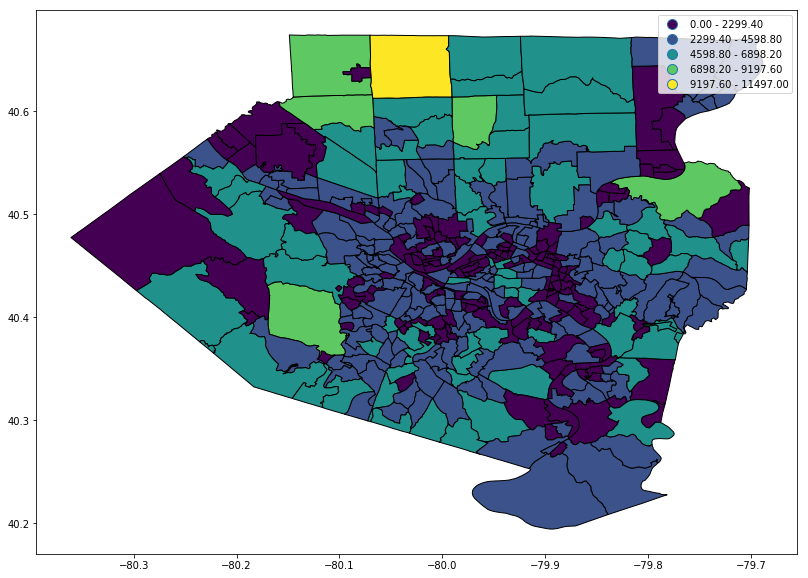

In [31]:
final.plot(column=('DP0010001'), edgecolor='black', scheme='equal_interval', figsize=(16,10),legend=True)

# Transform of Gyms and Parks from cataogrical to numerical

Since parks and gyms have been spaially joined into dataset I can now run a function to convert the count of gyms and parks into a measurment of desnity. What that would look like is gyms/persons and parks/person.

Why am I using population? I am making an assumption that people that live closer to the facility are the ones that best represent the relationship in the tract to the facitliy. 

Steps:
<ol type="1">
    <li>Select the column (either parks or gyms)</li>
    <li>Add a new column called either gym_num or park_num and count the number of gyms per tract</li>
    <li>Perform a (park per tract/ population) * 100 function for a new column called Park-Pop_Density</li>
    <li>Perform a (gym per tract / population) * 100 calculation on a new column called Gym-Pop_Density</li>
</ol>

In [32]:
#joined_park.groupby('GEOID')['Name'].count()
temp_parks = DataFrame({'park_num': joined_park.groupby('GEOID')['Name'].count()}).reset_index()
temp_parks

,GEOID,park_num
0,42003010300,0
1,42003020100,8
2,42003020300,0
3,42003030500,0
4,42003040200,0
5,42003040400,2
6,42003040500,0
7,42003040600,0
8,42003040900,0
9,42003050100,0


In [33]:
temp_parks['GEOID'] = temp_parks["GEOID"].astype(int)
final = final.merge(temp_parks, on = 'GEOID', how = 'left')
final

,GEOID,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,DP0010006,DP0010007,DP0010008,DP0010009,DP0010010,DP0010011,DP0010012,DP0010013,DP0010014,DP0010015,DP0010016,DP0010017,DP0010018,DP0010019,...,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry_x,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry_y,stname,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity,park_num
0,42003560500,Census Tract 5605,464657.0,0.0,+40.4377740,-079.8912723,2176.0,95.0,55.0,62.0,59.0,200.0,334.0,257.0,165.0,157.0,126.0,165.0,172.0,116.0,68.0,42.0,50.0,29.0,24.0,...,2.06,1.57,0.028671,0.000049,POLYGON ((-79.88975199999999 40.43554400000005...,42,003,560500,42003560500,5605,Census Tract 5605,G5020,S,476378,0,+40.4377113,-079.8911821,"POLYGON ((-79.88928899999999 40.435547, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.224347,0
1,42003560400,Census Tract 5604,511109.0,0.0,+40.4446636,-079.8902459,1559.0,65.0,57.0,61.0,73.0,114.0,139.0,105.0,77.0,88.0,132.0,144.0,145.0,125.0,64.0,46.0,37.0,43.0,44.0,...,2.08,1.59,0.033494,0.000054,"POLYGON ((-79.88648000000001 40.4400940000001,...",42,003,560400,42003560400,5604,Census Tract 5604,G5020,S,507627,0,+40.4447000,-079.8902060,"POLYGON ((-79.88654799999999 40.440502, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.437485,0
2,42003552400,Census Tract 5524,2044853.0,200574.0,+40.3332132,-079.8436326,3017.0,173.0,177.0,174.0,188.0,179.0,170.0,157.0,159.0,196.0,214.0,242.0,225.0,164.0,135.0,121.0,122.0,120.0,101.0,...,2.22,2.31,0.098148,0.000238,POLYGON ((-79.84286199999997 40.32385499999998...,42,003,552400,42003552400,5524,Census Tract 5524,G5020,S,2050701,210971,+40.3332132,-079.8436326,"POLYGON ((-79.842862 40.32385499999999, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.302839,0
3,42003552300,Census Tract 5523,830982.0,0.0,+40.3417540,-079.8513513,2184.0,135.0,164.0,200.0,218.0,137.0,108.0,123.0,123.0,111.0,156.0,159.0,146.0,116.0,92.0,67.0,53.0,45.0,31.0,...,2.38,2.83,0.050429,0.000088,"POLYGON ((-79.84599300000002 40.345144, -79.84...",42,003,552300,42003552300,5523,Census Tract 5523,G5020,S,830478,0,+40.3417540,-079.8513545,"POLYGON ((-79.84599299999999 40.345144, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.478170,0
4,42003552200,Census Tract 5522,804538.0,243347.0,+40.3488998,-079.8775090,1100.0,71.0,51.0,67.0,72.0,77.0,69.0,66.0,57.0,73.0,91.0,110.0,77.0,60.0,33.0,42.0,29.0,30.0,25.0,...,2.26,2.31,0.048411,0.000111,POLYGON ((-79.87062999999995 40.35538800000012...,42,003,552200,42003552200,5522,Census Tract 5522,G5020,S,816471,248584,+40.3493744,-079.8763413,"POLYGON ((-79.87062999999999 40.355388, -79.87...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.303568,0
5,42003552100,Census Tract 5521,692578.0,85815.0,+40.3450536,-079.8633846,1450.0,94.0,76.0,71.0,75.0,74.0,47.0,44.0,57.0,50.0,65.0,94.0,65.0,91.0,83.0,70.0,77.0,121.0,196.0,...,2.17,2.01,0.049635,0.000083,POLYGON ((-79.86800399999993 40.34957900000001...,42,003,552100,42003552100,5521,Census Tract 5521,G5020,S,692578,89238,+40.3450536,-079.8633846,"POLYGON ((-79.868004 40.349579, -79.867818 40....",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.388908,0
6,42003060500,Census Tract 605,657516.0,0.0,+40.4576591,-079.9662264,1274.0,55.0,45.0,27.0,39.0,109.0,147.0,141.0,76.0,84.0,93.0,84.0,102.0,68.0,43.0,50.0,23.0,50.0,38.0,...,2.07,1.58,0.049557,0.000070,POLYGON ((-79.95733899999993 40.45863400000007...,42,003,60500,42003060500,605,Census Tract 605,G5020,S,714445,0,+40.4578844,-079.9658865,"POLYGON ((-79.95885299999999 40.457975, -79.95...",Pennsylvania,NaN,PITTSBURGH,Pittsburgh,Polish Hill,0.320701,0
7,42003060300,Census Tract 603,1119311.0,144825.0,+40.4649258,-079.9653098,2341.0,85.0,89.0,108.0,104.0,244.0,351.0,208.0,132.0,143.0,139.0,152.0,154.0,127.0,92.0,55.0,62.0,44.0,52.0,...,2.10,1.88,0.055178,0.000134,POLYGON ((-79.95921999999996 40.46623499999993...,42,003,

In [34]:
temp_gyms = DataFrame({'gym_num' : joined_gyms.groupby('GEOID')['Gym_Name'].count()}).reset_index()
temp_gyms

,GEOID,gym_num
0,42003010300,0
1,42003020100,4
2,42003020300,0
3,42003030500,0
4,42003040200,0
5,42003040400,0
6,42003040500,0
7,42003040600,0
8,42003040900,0
9,42003050100,0


In [35]:
temp_gyms['GEOID'] = temp_gyms["GEOID"].astype(int)
final = final.merge(temp_gyms, on = 'GEOID', how = 'left')
final

,GEOID,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,DP0010006,DP0010007,DP0010008,DP0010009,DP0010010,DP0010011,DP0010012,DP0010013,DP0010014,DP0010015,DP0010016,DP0010017,DP0010018,DP0010019,...,DP0230002,Shape_Leng,Shape_Area,geometry_x,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry_y,stname,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity,park_num,gym_num
0,42003560500,Census Tract 5605,464657.0,0.0,+40.4377740,-079.8912723,2176.0,95.0,55.0,62.0,59.0,200.0,334.0,257.0,165.0,157.0,126.0,165.0,172.0,116.0,68.0,42.0,50.0,29.0,24.0,...,1.57,0.028671,0.000049,POLYGON ((-79.88975199999999 40.43554400000005...,42,003,560500,42003560500,5605,Census Tract 5605,G5020,S,476378,0,+40.4377113,-079.8911821,"POLYGON ((-79.88928899999999 40.435547, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.224347,0,0
1,42003560400,Census Tract 5604,511109.0,0.0,+40.4446636,-079.8902459,1559.0,65.0,57.0,61.0,73.0,114.0,139.0,105.0,77.0,88.0,132.0,144.0,145.0,125.0,64.0,46.0,37.0,43.0,44.0,...,1.59,0.033494,0.000054,"POLYGON ((-79.88648000000001 40.4400940000001,...",42,003,560400,42003560400,5604,Census Tract 5604,G5020,S,507627,0,+40.4447000,-079.8902060,"POLYGON ((-79.88654799999999 40.440502, -79.88...",Pennsylvania,NaN,WILKINSBURG,Wilkinsburg,NaN,0.437485,0,0
2,42003552400,Census Tract 5524,2044853.0,200574.0,+40.3332132,-079.8436326,3017.0,173.0,177.0,174.0,188.0,179.0,170.0,157.0,159.0,196.0,214.0,242.0,225.0,164.0,135.0,121.0,122.0,120.0,101.0,...,2.31,0.098148,0.000238,POLYGON ((-79.84286199999997 40.32385499999998...,42,003,552400,42003552400,5524,Census Tract 5524,G5020,S,2050701,210971,+40.3332132,-079.8436326,"POLYGON ((-79.842862 40.32385499999999, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.302839,0,0
3,42003552300,Census Tract 5523,830982.0,0.0,+40.3417540,-079.8513513,2184.0,135.0,164.0,200.0,218.0,137.0,108.0,123.0,123.0,111.0,156.0,159.0,146.0,116.0,92.0,67.0,53.0,45.0,31.0,...,2.83,0.050429,0.000088,"POLYGON ((-79.84599300000002 40.345144, -79.84...",42,003,552300,42003552300,5523,Census Tract 5523,G5020,S,830478,0,+40.3417540,-079.8513545,"POLYGON ((-79.84599299999999 40.345144, -79.84...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.478170,0,0
4,42003552200,Census Tract 5522,804538.0,243347.0,+40.3488998,-079.8775090,1100.0,71.0,51.0,67.0,72.0,77.0,69.0,66.0,57.0,73.0,91.0,110.0,77.0,60.0,33.0,42.0,29.0,30.0,25.0,...,2.31,0.048411,0.000111,POLYGON ((-79.87062999999995 40.35538800000012...,42,003,552200,42003552200,5522,Census Tract 5522,G5020,S,816471,248584,+40.3493744,-079.8763413,"POLYGON ((-79.87062999999999 40.355388, -79.87...",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.303568,0,0
5,42003552100,Census Tract 5521,692578.0,85815.0,+40.3450536,-079.8633846,1450.0,94.0,76.0,71.0,75.0,74.0,47.0,44.0,57.0,50.0,65.0,94.0,65.0,91.0,83.0,70.0,77.0,121.0,196.0,...,2.01,0.049635,0.000083,POLYGON ((-79.86800399999993 40.34957900000001...,42,003,552100,42003552100,5521,Census Tract 5521,G5020,S,692578,89238,+40.3450536,-079.8633846,"POLYGON ((-79.868004 40.349579, -79.867818 40....",Pennsylvania,NaN,MCKEESPORT,Mckeesport,NaN,0.388908,0,0
6,42003060500,Census Tract 605,657516.0,0.0,+40.4576591,-079.9662264,1274.0,55.0,45.0,27.0,39.0,109.0,147.0,141.0,76.0,84.0,93.0,84.0,102.0,68.0,43.0,50.0,23.0,50.0,38.0,...,1.58,0.049557,0.000070,POLYGON ((-79.95733899999993 40.45863400000007...,42,003,60500,42003060500,605,Census Tract 605,G5020,S,714445,0,+40.4578844,-079.9658865,"POLYGON ((-79.95885299999999 40.457975, -79.95...",Pennsylvania,NaN,PITTSBURGH,Pittsburgh,Polish Hill,0.320701,0,3
7,42003060300,Census Tract 603,1119311.0,144825.0,+40.4649258,-079.9653098,2341.0,85.0,89.0,108.0,104.0,244.0,351.0,208.0,132.0,143.0,139.0,152.0,154.0,127.0,92.0,55.0,62.0,44.0,52.0,...,1.88,0.055178,0.000134,POLYGON ((-79.95921999999996 40.46623499999993...,42,003,60300,42003060300,603,Census

### Variable Creation:

In [36]:
final['Park-Pop_Density'] = ''
final['Park-Pop_Density'] = (final['park_num']/final['DP0010001'])*100

In [37]:
final['Gym-Pop_Density'] = ''
final['Gym-Pop_Density'] = (final['gym_num']/final['DP0010001'])*100
#final.to_excel('Final_polish.xlsx')

In [38]:
final.dropna()

,GEOID,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,DP0010006,DP0010007,DP0010008,DP0010009,DP0010010,DP0010011,DP0010012,DP0010013,DP0010014,DP0010015,DP0010016,DP0010017,DP0010018,DP0010019,...,Shape_Area,geometry_x,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry_y,stname,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity,park_num,gym_num,Park-Pop_Density,Gym-Pop_Density
17,42003562000,Census Tract 5620,586939.0,0.0,+40.4518379,-079.9538987,3247.0,56.0,39.0,18.0,108.0,1269.0,471.0,192.0,94.0,56.0,85.0,90.0,142.0,113.0,128.0,98.0,106.0,77.0,105.0,...,0.000062,POLYGON ((-79.95806700000003 40.44872800000002...,42,003,40300,42003040300,403,Census Tract 403,G5020,S,466604,0,+40.4460568,-079.9572133,"POLYGON ((-79.958474 40.448449, -79.9583239999...",Pennsylvania,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,0.070353,0,0,0.000000,0.000000
20,42003561600,Census Tract 5616,1570375.0,0.0,+40.4148519,-079.9663546,2113.0,149.0,131.0,129.0,150.0,204.0,183.0,121.0,121.0,108.0,160.0,160.0,155.0,102.0,75.0,46.0,45.0,42.0,32.0,...,0.000167,POLYGON ((-79.96283099999988 40.40972500000004...,42,003,160300,42003160300,1603,Census Tract 1603,G5020,S,1259319,0,+40.4144158,-079.9675156,"POLYGON ((-79.963543 40.40955599999999, -79.96...",Pennsylvania,561600,PITTSBURGH,Pittsburgh,Arlington,0.334520,0,0,0.000000,0.000000
21,42003561600,Census Tract 5616,1570375.0,0.0,+40.4148519,-079.9663546,2113.0,149.0,131.0,129.0,150.0,204.0,183.0,121.0,121.0,108.0,160.0,160.0,155.0,102.0,75.0,46.0,45.0,42.0,32.0,...,0.000167,POLYGON ((-79.96283099999988 40.40972500000004...,42,003,160400,42003160400,1604,Census Tract 1604,G5020,S,294192,0,+40.4168800,-079.9615214,POLYGON ((-79.96234699999999 40.41514799999999...,Pennsylvania,561600,PITTSBURGH,Pittsburgh,Arlington Heights,0.473120,0,0,0.000000,0.000000
22,42003561700,Census Tract 5617,1075703.0,0.0,+40.4093198,-079.9739799,718.0,43.0,57.0,58.0,47.0,55.0,40.0,46.0,37.0,38.0,51.0,64.0,76.0,23.0,28.0,24.0,13.0,10.0,8.0,...,0.000114,POLYGON ((-79.96281399999998 40.40967200000006...,42,003,160600,42003160600,1606,Census Tract 1606,G5020,S,787231,0,+40.4088693,-079.9722589,"POLYGON ((-79.975235 40.413179, -79.974981 40....",Pennsylvania,561700,PITTSBURGH,Pittsburgh,Saint Clair,0.699500,0,0,0.000000,0.000000
23,42003561700,Census Tract 5617,1075703.0,0.0,+40.4093198,-079.9739799,718.0,43.0,57.0,58.0,47.0,55.0,40.0,46.0,37.0,38.0,51.0,64.0,76.0,23.0,28.0,24.0,13.0,10.0,8.0,...,0.000114,POLYGON ((-79.96281399999998 40.40967200000006...,42,003,160700,42003160700,1607,Census Tract 1607,G5020,S,268779,0,+40.4108691,-079.9793773,"POLYGON ((-79.981015 40.407752, -79.981048 40....",Pennsylvania,561700,PITTSBURGH,Pittsburgh,Mount Oliver Neighborhood,0.380567,0,0,0.000000,0.000000
73,42003982200,Census Tract 9822,505672.0,0.0,+40.4444879,-079.9547652,4816.0,0.0,0.0,0.0,3066.0,1746.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000054,POLYGON ((-79.95265999999998 40.44180900000009...,42,003,50700,42003050700,507,Census Tract 507,G5020,S,379745,0,+40.4539478,-079.9526658,"POLYGON ((-79.95593599999999 40.460303, -79.95...",Pennsylvania,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,0.138806,0,0,0.000000,0.000000
74,42003980700,Census Tract 9807,563109.0,416134.0,+40.4366295,-080.0102703,19.0,1.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000104,POLYGON ((-80.01772799999992 40.43973599999998...,42,003,192100,42003192100,1921,Census Tract 1921,G5020,S,519462,416134,+40.4358889,-080.0074676,"POLYGON ((-80.01772799999999 40.439736, -80.01...",Pennsylvania,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375,2,1,10.526316,5.263158
75,42003562700,Census Tract 5627,910379.0,5234.0,+40.4533625,-080.0115020,1395.0,61.0,63.0,49.0,75.0,139.0,175.0,124.0,81.0,77.0,77.0,87.0,87.0,90.0,59.0,46.0,42.0,42.0,21.0,...,0.000097,POLYGON ((-80.01806799999991 40.

In [41]:
final = final.reset_index()
final = final.rename(columns={'index':'Key'})

# Exploratory Data Analysis

Dependent Variable: Obesity

Independent Variables: Gyms, Parks, Municipalitiy and Water_Area

Purpose: to ensure that the data will meet the assumptions for least ordered squares regression.
<ol Type="1">
    <li>Data is normally distributed.</li>
    <li>There is a linear relationship.</li>
    <li>Residuals are homosecatic.</li>
    <li>Data is not catagorical</li>
    <li>Data is not spatially autocorrelated</li>
    <li>Multicollinearity is not present</li>
    <li>Identification of outliers</li>
</ol>

Plan of attack:
<ol Type="1">
    <li>Histograms, boxplots, and Wilcoxcon form scistats</li>
    <li>Scatter plots will address this</li>
    <li>Running a test regression and plotting the residuals</li>
    <li>Data dimensions will explain why there are not catagorical</li>
    <li>Moran's I will be used to check</li>
    <li>Person's r, and if I can figure out if there is any VIF output for scipy or statmat or sci-kitlearn</li>
    <li>This will be solved with the Histograms, and boxplots</li>
</ol>

##### EDA method
I made this method to put all the tools for the EDA in one place I have more information above it to help explain what is going on.

In [2]:
# the x parameter is the input column from a pandas dataframe ie. df['colmun']
# This method requires pandas, numpy, scipy stats, scipy.stats kurtosis, scipy.stats skew, matplotlib .
def EDA(x,df,column_name_string):
    #tables and print lines
    print('Kurtosis: ',kurtosis(x))
    print('Skewness: ',skew(x))
    one = stats.wilcoxon(x)
    two = x.describe()
    
    fig = plt.figure(1)
    #graphs
    gridsize = (2,2)
    plt.subplot2grid(gridsize,(0,0))
    #scatter plot
    plt.scatter(final['Key'], x)
    
    plt.subplot2grid(gridsize,(0,1))
    #histogram
    plt.hist([column_name_string])

    plt.subplot2grid(gridsize,(1,0))
    #boxplot
    df.boxplot([column_name_string],grid=False)
    
    plt.subplot2grid(gridsize,(1,1))
    #Probability Plot
    stats.probplot(x, plot=plt)  
    return one, two

#### Obesity

Data Dimensions:
<ol Type="1">
  <li>Indvidiual vs Spaitally aggregated</li>
  <li>Sample vs population</li>
  <li>Implicitly spatial vs Explicitly spatial</li>
  <li>Discrete vs continuous</li>
  <li>Quantitative vs qualitative</li>
  <li>Nominal vs ordinal vs interval vs ratio</li>
</ol>

Dimensions classifications and explainations:
<ol Type="1">
    <li>Obesity is a measrument of <b>individuals</b> whom fall under the catagory of a BMI index rating of 30 or higher. In this circumstance obesity has been aggrgated to the tract scale, making the individuals undistinguishable from the rest of the tract. Therefore this data is of a <b>spatially aggregated</b> nature.</li>
    <li>Since obesity rates are collected by the CDC, this data is based on a <b>sample</b> of the population because they measure at the county level. As referenced in the metadata, this is a staticial desmination of population of each cencus tract with obesity rates measured from the county level.</li>
    <li>This data is <b>Explicitly spatial</b>, because of the rates of obesity being directly tied to each tract</li>
    <li>Obesity is a <b>continous</b> form of measrument because it can be measured with even finer percision thn what is presented in this study.</li>
    <li>This is a <b>Quantitative</b> measurment, because of the numerical nature of the data.</li>
    <li>This data is <b>Ratio</b> level. There are no negatives and any tract with a rate of zero obesity has meaning. Zero is not arbitrary.</li>

Kurtosis:  5.1868767219770575
Skewness:  1.8353889055046517


(WilcoxonResult(statistic=0.0, pvalue=6.636685802753196e-70),
 count    416.000000
 mean       0.299506
 std        0.113258
 min        0.070353
 25%        0.240699
 50%        0.282818
 75%        0.313238
 max        0.922932
 Name: Obesity, dtype: float64)

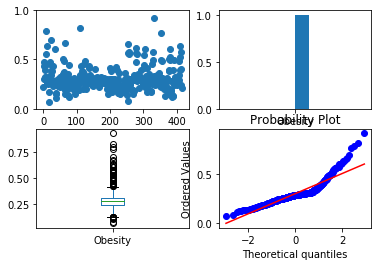

In [55]:
EDA(clean_data['Obesity'],clean_data,'Obesity')

#### Park-Pop_Density

Data Dimensions:
<ol Type="1">
  <li>Indvidiual vs Spaitally aggregated</li>
  <li>Sample vs population</li>
  <li>Implicitly spatial vs Explicitly spatial</li>
  <li>Discrete vs continuous</li>
  <li>Quantitative vs qualitative</li>
  <li>Nominal vs ordinal vs interval vs ratio</li>
</ol>

<ol Type="1">
    <li><b>Spaitally aggregated</b> would describe this variable because there are no discrete points or indivdiuals referenced by this variable.</li>
    <li><b>Population data</b> would best describe this variable becuase of the entire survey of parks in the area and the blending of the Census population data to it</li>
    <li>Since the parks are aggreated into the tracts along with the population this making this data <b>Implicitly spatial</b></li>
    <li>This is a <b>discrete</b> measurement because of the whole number values used. There are no smaller divisions of parks or people</li>
    <li>This is a numerically represented variable making it <b>quantitative</b>.</li>
    <li>Since zero is not a arbitrary value and there are no negatives in this dataset this variable is <b>Ratio</b> level data</li>
</ol>

Kurtosis:  nan
Skewness:  nan


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


(WilcoxonResult(statistic=0.0, pvalue=5.949326652303364e-05),
 count    412.000000
 mean       0.028302
 std        0.518708
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max       10.526316
 Name: Park-Pop_Density, dtype: float64)

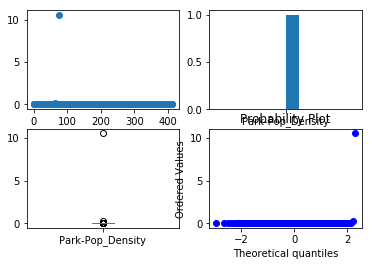

In [57]:
EDA(clean_data['Park-Pop_Density'],clean_data,'Park-Pop_Density')

#### Gym-Pop_Density

Data Dimensions:
<ol Type="1">
  <li>Indvidiual vs Spaitally aggregated</li>
  <li>Sample vs population</li>
  <li>Implicitly spatial vs Explicitly spatial</li>
  <li>Discrete vs continuous</li>
  <li>Quantitative vs qualitative</li>
  <li>Nominal vs ordinal vs interval vs ratio</li>
</ol>

Kurtosis:  nan
Skewness:  nan


(WilcoxonResult(statistic=0.0, pvalue=5.385990057983034e-07),
 count    412.000000
 mean       0.038179
 std        0.517042
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        9.090909
 Name: Gym-Pop_Density, dtype: float64)

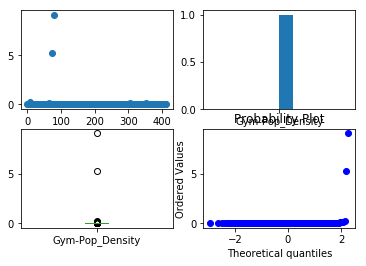

In [58]:
EDA(clean_data['Gym-Pop_Density'],clean_data,'Gym-Pop_Density')

### Gym num

Kurtosis:  nan
Skewness:  nan


(WilcoxonResult(statistic=0.0, pvalue=5.385990057983034e-07),
 count    412.000000
 mean       0.038179
 std        0.517042
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        9.090909
 Name: Gym-Pop_Density, dtype: float64)

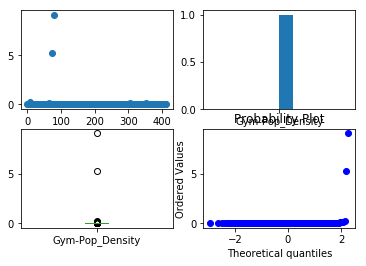

In [42]:
EDA(final['Gym-Pop_Density'],final,'Gym-Pop_Density')

### Park num

Kurtosis:  nan
Skewness:  nan


(WilcoxonResult(statistic=0.0, pvalue=5.949326652303364e-05),
 count    412.000000
 mean       0.028302
 std        0.518708
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max       10.526316
 Name: Park-Pop_Density, dtype: float64)

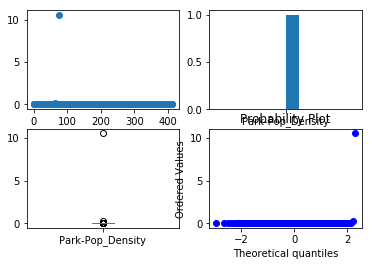

In [43]:
EDA(final['Park-Pop_Density'],final,'Park-Pop_Density')

# Pearson's R Matrix

In [49]:
corr = clean_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Key,GEOID,AWATER10,DP0010001,Tract_Num,ALAND00,Obesity,park_num,gym_num,Park-Pop_Density,Gym-Pop_Density,AWATER00
Key,1,-0.215157,0.108059,-0.0572447,-0.24294,0.0671438,0.0184568,-0.0464983,-0.0813185,-0.055269,-0.0747728,0.0214804
GEOID,-0.215157,1,0.173785,0.097974,0.688841,0.136606,-0.0950488,-0.0998771,-0.156852,0.162372,0.220886,0.095167
AWATER10,0.108059,0.173785,1,-0.0121916,0.110891,0.155647,-0.0146974,0.0432174,-0.0226501,0.0617646,0.0911616,0.838042
DP0010001,-0.0572447,0.097974,-0.0121916,1,0.256372,0.415731,-0.378094,0.0672327,0.0606826,-0.0966529,-0.135876,-0.0278315
Tract_Num,-0.24294,0.688841,0.110891,0.256372,1,0.232849,-0.220418,-0.147105,-0.172603,-0.0610673,-0.0777234,0.0791038
ALAND00,0.0671438,0.136606,0.155647,0.415731,0.232849,1,-0.166292,0.00340068,0.0205497,-0.0239519,-0.0306929,0.196182
Obesity,0.0184568,-0.0950488,-0.0146974,-0.378094,-0.220418,-0.166292,1,0.0304801,0.0494047,0.0245198,0.0685986,0.0440482
park_num,-0.0464983,-0.0998771,0.0432174,0.0672327,-0.147105,0.00340068,0.0304801,1,0.400572,0.192715,0.0815559,0.0544026
gym_num,-0.0813185,-0.156852,-0.0226501,0.0606826,-0.172603,0.0205497,0.0494047,0.400572,1,0.121986,0.179767,0.0129262
Park-Pop_Density,-0.055269,0.162372,0.0617646,-0.0966529,-0.0610673,-0.0239519,0.0245198,0.192715,0.121986,1,0.498821,0.0715934


# Moran's I spatial auto-correlation

Source

@online{darribas_gds15,
  author = {Dani Arribas-Bel},
  title = {Geographic Data Science'15},
  year = 2016,
  url = {http://darribas.org/gds15},
  urldate = {2016-02-19}
  doi = {10.5281/zenodo.46313}
}

In [51]:
import pysal as ps

In [53]:
w_queen = ps.queen_from_shapefile(final, idVariable='Obesity')
w_queen

TypeError: expected str, bytes or os.PathLike object, not GeoDataFrame

# Multivariate Regression with Sci-KitLearn <a class="anchor" id="Regression"></a>

Using Sci-Kit learn's module for Multivariate Regression
<ul Type="1">
    <li>The indpenedent variables are stored in the X variable.</li>
    <li>Y is the variable in which the dependent variable is stored in.</li>
    <li>Using the preprocessing function in the Sci-KitLearn Module the training data is split from the test data</li>
    <li>Linear Regression from Sci-KitLearn is imported and then saved to regressor.</li>
    <li>Regessor is then called to fit the training data for the independent and dependent variables.</li>
    <li>Then the regession is run.</li>
</ul>

#### Methodology
In Rosenberger 2005, their regression involved nesting hierarchy. Where I will differentiate is with using a least ordered squares and analyze the predictive nature of this model. One of the reasons why I can avoid the nested hierarchy regression used previously is I am not using county level data.

In [84]:
final = final.fillna(0)

In [39]:
# probably don't need this 😎
final['Obesity'] = final['Obesity'].astype(int)
final['AWATER00'] = final['AWATER00'].astype(int)
final['park_num'] = final['park_num'].astype(int)
final['gym_num'] = final['gym_num'].astype(int)
final['Gym-Pop_Density'] = final['Gym-Pop_Density'].astype(int)

KeyError: 'park_num'

In [85]:
final

,GEOID,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,DP0010006,DP0010007,DP0010008,DP0010009,DP0010010,DP0010011,DP0010012,DP0010013,DP0010014,DP0010015,DP0010016,DP0010017,DP0010018,DP0010019,...,Shape_Area,geometry_x,STATEFP00,COUNTYFP00,Tract_Num,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry_y,stname,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,Obesity,park_num,gym_num,Park-Pop_Density,Gym-Pop_Density
0,42003560500,Census Tract 5605,464657.0,0.0,+40.4377740,-079.8912723,2176.0,95.0,55.0,62.0,59.0,200.0,334.0,257.0,165.0,157.0,126.0,165.0,172.0,116.0,68.0,42.0,50.0,29.0,24.0,...,0.000049,POLYGON ((-79.88975199999999 40.43554400000005...,42,003,560500,42003560500,5605,Census Tract 5605,G5020,S,476378,0,+40.4377113,-079.8911821,"POLYGON ((-79.88928899999999 40.435547, -79.88...",Pennsylvania,0,WILKINSBURG,Wilkinsburg,0,0.224347,0,0,0.000000,0.000000
1,42003560400,Census Tract 5604,511109.0,0.0,+40.4446636,-079.8902459,1559.0,65.0,57.0,61.0,73.0,114.0,139.0,105.0,77.0,88.0,132.0,144.0,145.0,125.0,64.0,46.0,37.0,43.0,44.0,...,0.000054,"POLYGON ((-79.88648000000001 40.4400940000001,...",42,003,560400,42003560400,5604,Census Tract 5604,G5020,S,507627,0,+40.4447000,-079.8902060,"POLYGON ((-79.88654799999999 40.440502, -79.88...",Pennsylvania,0,WILKINSBURG,Wilkinsburg,0,0.437485,0,0,0.000000,0.000000
2,42003552400,Census Tract 5524,2044853.0,200574.0,+40.3332132,-079.8436326,3017.0,173.0,177.0,174.0,188.0,179.0,170.0,157.0,159.0,196.0,214.0,242.0,225.0,164.0,135.0,121.0,122.0,120.0,101.0,...,0.000238,POLYGON ((-79.84286199999997 40.32385499999998...,42,003,552400,42003552400,5524,Census Tract 5524,G5020,S,2050701,210971,+40.3332132,-079.8436326,"POLYGON ((-79.842862 40.32385499999999, -79.84...",Pennsylvania,0,MCKEESPORT,Mckeesport,0,0.302839,0,0,0.000000,0.000000
3,42003552300,Census Tract 5523,830982.0,0.0,+40.3417540,-079.8513513,2184.0,135.0,164.0,200.0,218.0,137.0,108.0,123.0,123.0,111.0,156.0,159.0,146.0,116.0,92.0,67.0,53.0,45.0,31.0,...,0.000088,"POLYGON ((-79.84599300000002 40.345144, -79.84...",42,003,552300,42003552300,5523,Census Tract 5523,G5020,S,830478,0,+40.3417540,-079.8513545,"POLYGON ((-79.84599299999999 40.345144, -79.84...",Pennsylvania,0,MCKEESPORT,Mckeesport,0,0.478170,0,0,0.000000,0.000000
4,42003552200,Census Tract 5522,804538.0,243347.0,+40.3488998,-079.8775090,1100.0,71.0,51.0,67.0,72.0,77.0,69.0,66.0,57.0,73.0,91.0,110.0,77.0,60.0,33.0,42.0,29.0,30.0,25.0,...,0.000111,POLYGON ((-79.87062999999995 40.35538800000012...,42,003,552200,42003552200,5522,Census Tract 5522,G5020,S,816471,248584,+40.3493744,-079.8763413,"POLYGON ((-79.87062999999999 40.355388, -79.87...",Pennsylvania,0,MCKEESPORT,Mckeesport,0,0.303568,0,0,0.000000,0.000000
5,42003552100,Census Tract 5521,692578.0,85815.0,+40.3450536,-079.8633846,1450.0,94.0,76.0,71.0,75.0,74.0,47.0,44.0,57.0,50.0,65.0,94.0,65.0,91.0,83.0,70.0,77.0,121.0,196.0,...,0.000083,POLYGON ((-79.86800399999993 40.34957900000001...,42,003,552100,42003552100,5521,Census Tract 5521,G5020,S,692578,89238,+40.3450536,-079.8633846,"POLYGON ((-79.868004 40.349579, -79.867818 40....",Pennsylvania,0,MCKEESPORT,Mckeesport,0,0.388908,0,0,0.000000,0.000000
6,42003060500,Census Tract 605,657516.0,0.0,+40.4576591,-079.9662264,1274.0,55.0,45.0,27.0,39.0,109.0,147.0,141.0,76.0,84.0,93.0,84.0,102.0,68.0,43.0,50.0,23.0,50.0,38.0,...,0.000070,POLYGON ((-79.95733899999993 40.45863400000007...,42,003,60500,42003060500,605,Census Tract 605,G5020,S,714445,0,+40.4578844,-079.9658865,"POLYGON ((-79.95885299999999 40.457975, -79.95...",Pennsylvania,0,PITTSBURGH,Pittsburgh,Polish Hill,0.320701,0,3,0.000000,0.235479
7,42003060300,Census Tract 603,1119311.0,144825.0,+40.4649258,-079.9653098,2341.0,85.0,89.0,108.0,104.0,244.0,351.0,208.0,132.0,143.0,139.0,152.0,154.0,127.0,92.0,55.0,62.0,44.0,52.0,...,0.000134,POLYGON ((-79.95921999999996 40.46623499999993...,42,003,60300,42003060300,603,Census

In [86]:
X = final.iloc[:,214:217].values
y = final.iloc[:, 213].values

In [87]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

source for score function: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [107]:
regressor.score(X_test,y_test)

-14.847544609400508

In [91]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

-14.847544609400508

In [111]:
import statsmodels
X = final.iloc[:,214:218].values
obesity = final.iloc[:, 213].values

X2 = sm.add_constant(X)
regress2 = sm.OLS(y, X2)
regression = regress2.fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6683
Date:                Fri, 12 Apr 2019   Prob (F-statistic):              0.614
Time:                        14:06:34   Log-Likelihood:                 317.65
No. Observations:                 416   AIC:                            -625.3
Df Residuals:                     411   BIC:                            -605.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2978      0.006     51.848      0.0

# Conclusion



<center> <b>Works Cited</b>


Humpel, Nancy, Neville Owen, and Eva Leslie. "Environmental factors associated with adults’ participation in physical activity: a review." American journal of preventive medicine 22, no. 3 (2002): 188-199.

Kahn, Emily B., Leigh T. Ramsey, Ross C. Brownson, Gregory W. Heath, Elizabeth H. Howze, Kenneth E. Powell, Elaine J. Stone, Mummy W. Rajab, and Phaedra Corso. "The effectiveness of interventions to increase physical activity: a systematic review." American journal of preventive medicine 22, no. 4 (2002): 73-107.

Ding, Ding, and Klaus Gebel. "Built environment, physical activity, and obesity: what have we learned from reviewing the literature?." Health & place 18, no. 1 (2012): 100-105.

Janiszewski, Peter M., and Robert Ross. "Physical activity in the treatment of obesity: beyond body weight reduction." Applied Physiology, Nutrition, and Metabolism 32, no. 3 (2007): 512-522.

Eckel, Robert H. "Nonsurgical management of obesity in adults." New England Journal of Medicine 358, no. 18 (2008): 1941-1950.

Hill, James O., and Holly R. Wyatt. "Role of physical activity in preventing and treating obesity." Journal of Applied Physiology 99, no. 2 (2005): 765-770.

Courcoulas, Anita P., Steven H. Belle, Rebecca H. Neiberg, Sheila K. Pierson, Jessie K. Eagleton, Melissa A. Kalarchian, James P. DeLany, Wei Lang, and John M. Jakicic. "Three-year outcomes of bariatric surgery vs lifestyle intervention for type 2 diabetes mellitus treatment: a randomized clinical trial." JAMA surgery 150, no. 10 (2015): 931-940.

Gloy, Viktoria L., Matthias Briel, Deepak L. Bhatt, Sangeeta R. Kashyap, Philip R. Schauer, Geltrude Mingrone, Heiner C. Bucher, and Alain J. Nordmann. "Bariatric surgery versus non-surgical treatment for obesity: a systematic review and meta-analysis of randomised controlled trials." Bmj 347 (2013): f5934.

Gordon-Larsen, Penny, Melissa C. Nelson, Phil Page, and Barry M. Popkin. "Inequality in the built environment underlies key health disparities in physical activity and obesity." Pediatrics 117, no. 2 (2006): 417-424.

Rosenberger, Randall S., Yoav Sneh, Tim T. Phipps, and Rachel Gurvitch. "A spatial analysis of linkages between health care expenditures, physical inactivity, obesity and recreation supply." Journal of Leisure Research 37, no. 2 (2005): 216-235.

Brownson, Ross C., Christine M. Hoehner, Kristen Day, Ann Forsyth, and James F. Sallis. "Measuring the built environment for physical activity: state of the science." American journal of preventive medicine 36, no. 4 (2009): S99-S123.

McLaren, Lindsay. "Socioeconomic status and obesity." Epidemiologic reviews 29, no. 1 (2007): 29-48.
Swinburn, Boyd, Garry Egger, and Fezeela Raza. "Dissecting obesogenic environments: the development and application of a framework for identifying and prioritizing environmental interventions for obesity." Preventive medicine 29, no. 6 (1999): 563-570.

Finkelstein, Eric A., and Kiersten L. Strombotne. "The economics of obesity." The American journal of clinical nutrition 91, no. 5 (2010): 1520S-1524S.

Pitts, Stephanie B. Jilcott, Michael B. Edwards, Justin B. Moore, Kindal A. Shores, Katrina Drowatzky DuBose, and David McGranahan. "Obesity is inversely associated with natural amenities and recreation facilities per capita." Journal of physical activity and health 10, no. 7 (2013): 1032-1038.

Wolch, Jennifer, Michael Jerrett, Kim Reynolds, Rob McConnell, Roger Chang, Nicholas Dahmann, Kirby Brady, Frank Gilliland, Jason G. Su, and Kiros Berhane. "Childhood obesity and proximity to urban parks and recreational resources: a longitudinal cohort study." Health & place 17, no. 1 (2011): 207-214.

Abercrombie, Lauren C., James F. Sallis, Terry L. Conway, Lawrence D. Frank, Brian E. Saelens, and James E. Chapman. "Income and racial disparities in access to public parks and private recreation facilities." American journal of preventive medicine 34, no. 1 (2008): 9-15.

Sturm, Roland. "Increases in morbid obesity in the USA: 2000–2005." Public health 121, no. 7 (2007): 492-496.
Zhang, Qi, and Youfa Wang. "Trends in the association between obesity and socioeconomic status in US adults: 1971 to 2000." Obesity research 12, no. 10 (2004): 1622-1632.

Blanck, Heidi M., Diana Allen, Zarnaaz Bashir, Nina Gordon, Alyson Goodman, Dee Merriam, and Candace Rutt. "Let’s go to the park today: The role of parks in obesity prevention and improving the public’s health." Childhood Obesity (Formerly Obesity and Weight Management) 8, no. 5 (2012): 423-428.

Gies, Erica. "The health benefits of parks." The Trust for Public Land (2006): 1-24.

Ogden, Cynthia L., Margaret D. Carroll, Brian K. Kit, and Katherine M. Flegal. "Prevalence of childhood and adult obesity in the United States, 2011-2012." Jama 311, no. 8 (2014): 806-814.

Center for disease control and prevention. 2015. Body mass index. Atlanta. https://www.cdc.gov/healthyweight/assessing/bmi/index.html (last accessed 21 March 2019).

Ley, Sylvia H., Osama Hamdy, Viswanathan Mohan, and Frank B. Hu. "Prevention and management of type 2 diabetes: dietary components and nutritional strategies." The Lancet383, no. 9933 (2014): 1999-2007.

Evans, Tim, Steven Cummins, and Tim Brown. "Neighbourhood deprivation and the cost of accessing gyms and fitness centres: National study in Wales." Health & place24 (2013): 16-19.